# Hierarchical Clustering - Code Notebook Solution
**Author**: Dr. Yves Staudt

CAS: Machine Learning - Unsupervised Learning

## Loading Packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
# Loading cluster functions from scipy
import scipy.cluster.hierarchy as shc
# Loading agglomerative function from scikit-learn
from sklearn.cluster import AgglomerativeClustering

import plotly.express as px

## Loading Data

In [2]:
# Attention to adapt path
df = pd.read_csv('lego_dataset_encoded_prepared_selected_feature.csv')

## Scaling Data

In [3]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(df)

# transform train and test sets
df_scaled = scaler.transform(df)

In [4]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

## Choice of Linkage Measure

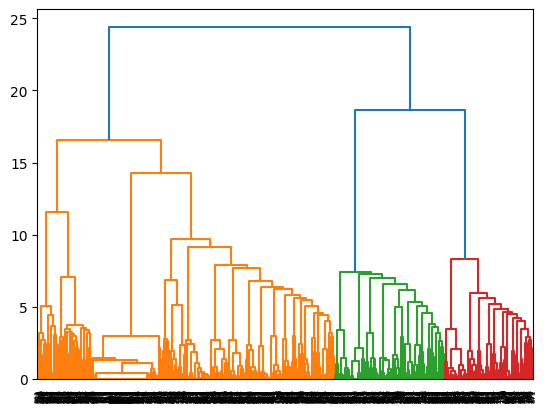

In [5]:
dendogram = shc.dendrogram(shc.linkage(df_scaled, method='ward'))

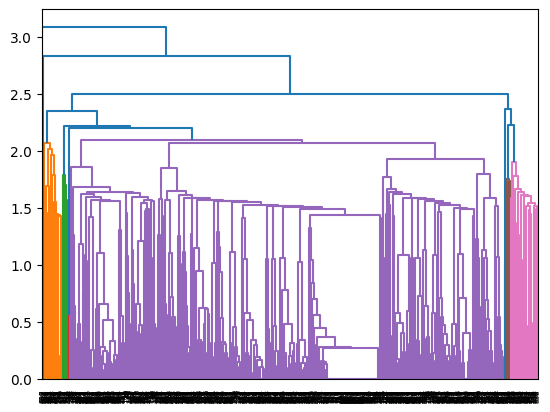

In [6]:
dendogram = shc.dendrogram(shc.linkage(df_scaled, method='average'))

## Hierarchical Clustering

In [7]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(df_scaled)
labels = model.labels_

/Users/ystaudt/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Interpreting Results

In [8]:
df_orig = df
df_orig['cluster_predict'] = model.labels_

In [9]:
df_orig[['cluster_predict']].groupby('cluster_predict').value_counts()

cluster_predict
0    437
1     97
2    196
3    160
Name: count, dtype: int64

In [10]:
df_orig.groupby('cluster_predict').describe()

Empfohlenes Alter in Jahren (mind.)                           \
                                              count      mean       std  min   
cluster_predict                                                                
0                                             437.0  8.711670  4.199490  1.5   
1                                              97.0  8.685567  4.683370  1.5   
2                                             196.0  5.974490  3.051584  1.5   
3                                             160.0  8.343750  5.042021  1.5   

                                      Empfohlenes Alter in Jahren (max.)  \
                  25%  50%  75%   max                              count   
cluster_predict                                                            
0                7.00  7.0  9.0  18.0                              437.0   
1                6.00  7.0  9.0  23.0                               97.0   
2                4.00  6.0  7.0  18.0                              196.0   
3                5.75  7.0  9.0  18.0                              160.0   

                            ... LegoCategory_LEGO Jurassic World        \
                      mean  ...                               75%  max   
cluster_predict             ...                                          
0                97.741419  ...                               0.0  0.0   
1                96.309278  ...                               0.0  0.0   
2                99.000000  ...                               0.0  1.0   
3                99.000000  ...                               0.0  0.0   

                LegoCategory_LEGO Dots                                      \
                                  count      mean       std  min  25%  50%   
cluster_predict                                                              
0                                 437.0  0.036613  0.188026  0.0  0.0  0.0   
1                                  97.0  0.030928  0.174022  0.0  0.0  0.0   
2                                 196.0  0.010204  0.100756  0.0  0.0  0.0   
3                                 160.0  0.062500  0.242821  0.0  0.0  0.0   

                           
                 75%  max  
cluster_predict            
0                0.0  1.0  
1                0.0  1.0  
2                0.0  1.0  
3                0.0  1.0  

[4 rows x 312 columns]

## Figures

In [11]:
def my_boxplot_fct(data,variable):
    fig = px.box(data, x="cluster_predict", y=variable)
    fig.show()


In [12]:
df_orig.columns

Index(['Empfohlenes Alter in Jahren (mind.)',
       'Empfohlenes Alter in Jahren (max.)', 'Verpackungsbreite',
       'Verpackungstiefe', 'Verpackungshöhe', 'Paketgewicht',
       'kein_nachhaltigkeitszertifikat', 'Produktfarbe_Rare',
       'Ursprungsland_ Ungarn ', 'Ursprungsland_ China ',
       'Ursprungsland_ Tschechische Republik ', 'Ursprungsland_Rare',
       'Ursprungsland_ Dänemark ',
       'EU TSD Warnung_ Keine Warnung zutreffend, Nicht für Kinder unter 36 Monaten geeignet ',
       'EU TSD Warnung_ Nicht für Kinder unter 36 Monaten geeignet ',
       'EU TSD Warnung_ Nicht für Kinder unter 18 Monaten geeignet ',
       'Verpackungsart_ Box ', 'Verpackungsart_ Polybag ', 'LegoCategory_Rare',
       'LegoCategory_LEGO Disney ', 'LegoCategory_LEGO Technic ',
       'LegoCategory_LEGO City ', 'LegoCategory_LEGO Duplo ',
       'LegoCategory_LEGO Star Wars ', 'LegoCategory_LEGO Ninjago ',
       'LegoCategory_LEGO Icons ', 'LegoCategory_LEGO Marvel ',
       'LegoCategory_LEG

In [13]:
my_boxplot_fct(df_orig, "Empfohlenes Alter in Jahren (mind.)")

In [14]:
my_boxplot_fct(df_orig, "Verpackungstiefe")